In [1]:
from singleton_pattern import load_dataset_reader,load_model,load_data_generator,load_config
# load_config.init_config('config.yaml')
load_config.init_config('LSTCrPPG.yaml')

from util.torch_info import print_info
print_info()
non_dnn_method_list = load_config.get_non_dnn_method_list()

config = load_config.get_config()
config_hash = load_config.get_config_hash()
print(f'config_hash:{config_hash}')
model = load_model.get_model()
tensor_data_generator = load_data_generator.get_tensor_data_generator()
print(f'Method and Preprocessing Name: {config["method"]}')
print(f'Model:\n------------------\n{model}\n------------------')
test_loader = load_dataset_reader.get_test_reader()
print(f'Test Loader: {test_loader.loader_name}')

CUDA:
---------------------------
PyTorch supports GPU and currently has 1 CUDA devices available.
The current default CUDA device is: NVIDIA GeForce RTX 3090
---------------------------
config_hash:a1aab9a11b8c0e39f9053bd3ac3b51274d555bdc41c891fbe793e3b9871fc9d1
Method and Preprocessing Name: LSTCrPPG
Model:
------------------
LSTCrPPG(
  (encoder_block): EncoderBlock(
    (encoder_block1): Sequential(
      (0): ConvBlock3D(
        (conv_block_3d): Sequential(
          (0): Conv3d(3, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): ELU(alpha=1.0)
        )
      )
      (1): ConvBlock3D(
        (conv_block_3d): Sequential(
          (0): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): ELU(alpha=1.0)
        )
      )
      (2): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (encoder_block2): Sequential(
      (0): AvgPool3d(kernel_size=2, stride=2, padding=0)
      (1

In [2]:
import datetime
dataloader = None
def load_train_loader():
    global dataloader
    if dataloader != None:
        return dataloader
    train_reader = load_dataset_reader.get_train_reader()
    print(f'train_reader: {train_reader.loader_name}')
    data = train_reader.load_data()
    dataloader = tensor_data_generator.get_tensor_dataloader(data,force_clear_cache=False)
    return dataloader
def train():
    if config['method'] in non_dnn_method_list: 
        print('non train')
        return
    dataloader = load_train_loader()
    start_time = datetime.datetime.now()
    model.train_model(dataloader)
    runtime = datetime.datetime.now() - start_time
    hours, remainder = divmod(runtime.total_seconds(), 3600)
    minutes, seconds = divmod(remainder, 60)
    print(f"train total time:  {int(hours)}h:{int(minutes)}m:{int(seconds)}s")
# run train
train()

train_reader: UBFC_Phys
Root Path:D:\BaiduNetdiskDownload\UBFC-PHYs_1-12
Start Reading UBFC_Phys Dataset Directory...


Progress:   0%|          | 0/12 [00:00<?, ?it/s]

dataset size: 688
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 128])
torch.Size([1, 3, 175, 128, 12

In [ ]:
# test
model.eval()

data = test_loader.load_data()
test_dataloader = tensor_data_generator.get_tensor_dataloader(data,force_clear_cache=False)

# X,y = model.preprocessing(test_df)
# pred_y = model.forward(X)

# 评价指标


Root Path:D:\BaiduNetdiskDownload\UBFC-PHYs_1-12
Start Reading UBFC_Phys Dataset Directory...


Progress:   0%|          | 0/12 [00:00<?, ?it/s]

dataset size: 688


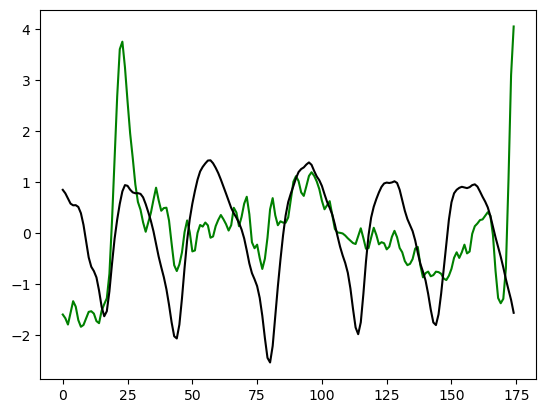

In [ ]:
# import matplotlib.pyplot as plt
# for X,y in test_dataloader:
#     y = y.to('cpu').numpy().reshape(-1)
#     X = X.to('cpu').numpy().reshape(-1)
#     plt.plot(X, label='X',color='g')
#     # # plt.plot(b, label='(B)',color='b')
#     plt.plot(y, label='PPG',color='k')
#     break
#     pass


# v = 49
# plt.plot(X[v,:,1], label='X',color='g')
# # plt.plot(b, label='(B)',color='b')
# plt.plot(y[v], label='PPG',color='k')